In [1]:
# Leitura do arquivo vindo do squad 2

import pandas as pd
import requests

def leitura():
    csv = requests.get("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv").content
    f = open('data.csv', 'wb')
    f.write(csv)
    f.close()
    df = pd.read_csv('data.csv')
    return df

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


Leitura executada com sucesso!
sepal.length
petal.length


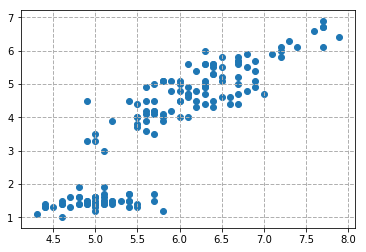

127.0.0.1 - - [24/Jan/2020 19:36:10] "POST /scatter HTTP/1.1" 200 -
127.0.0.1 - - [24/Jan/2020 19:36:50] "GET /scatter HTTP/1.1" 405 -
127.0.0.1 - - [24/Jan/2020 19:36:50] "GET /favicon.ico HTTP/1.1" 404 -


In [24]:
#Criar endpoint de post que retorna o gráfico de dispersão e tem como input um json com as coordenadas a serem 
#plotadas. Por exemplo: {“coords”: [“sepal.length”, “petal.length”]

from flask import Flask, request, current_app, jsonify
import matplotlib.pyplot as plt

app = Flask(__name__)

@app.route("/scatter", methods=['POST'])

def scatter():
    df = leitura()
    print("Leitura executada com sucesso!")
    parametros = request.json
    
    print(parametros["1"])
    print(parametros["2"])
    plt.scatter(df[parametros["1"]] , df[parametros["2"]] )
    plt.grid( linewidth= 1, linestyle="--")
    plt.show()
    return "grafico"  ,200

app.run()

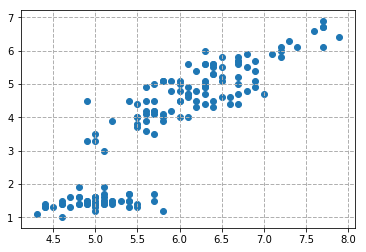

In [18]:
#- Criar endpoint de get que retorna o histograma

app = Flask(__name__)

@app.route("/scatter", methods=['POST'])

def scatter():
    df = leitura()
    print("Leitura executada com sucesso!")
    parametros = request.json
    
    print(parametros["1"])
    
    df.hist()
    
    plt.show()
    return "grafico"  ,200

app.run()

In [16]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


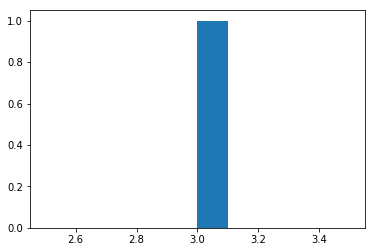

In [63]:



#plt.xticks(df["variety"].unique())

plt.hist(df["variety"].nunique())




plt.show()